In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Copper_Set.xlsx.csv')

C:\Users\vijay\AppData\Local\Temp\ipykernel_52824\3348997962.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set.xlsx.csv')


In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape

(181673, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### Handling Null values

In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
null_to_drop = ['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']
df = df.dropna(subset = null_to_drop)

### id column

In [8]:
len(df['id'].unique())

181637

In [9]:
df.drop('id', axis = 1, inplace = True)

### date column

In [10]:
col_to_date = ['item_date','delivery date']
for col in col_to_date:
    df[col] = df[col].astype(str)
    df[col] = pd.to_datetime(df[col],format='%Y%m%d.0', errors = 'coerce')

In [11]:
df['purchased_day'] = df['item_date'].dt.day
df['purchased_month'] = df['item_date'].dt.month
df['purchased_year'] = df['item_date'].dt.year

df['delivered_day'] = df['delivery date'].dt.day
df['delivered_month'] = df['delivery date'].dt.month
df['delivered_year'] = df['delivery date'].dt.year

In [12]:
df.drop(['item_date','delivery date'],axis = 1, inplace = True)

### quantity tons column

In [13]:
df['quantity tons'] = df['quantity tons'].astype(str)

In [14]:
count = 0
for index, value in df.iterrows():
    if value['quantity tons'].isalpha():
        count+=1
        print(index)
print(count)

173086
1


In [15]:
if 173086 in df.index:
    df = df.drop(173086)

In [16]:
df['quantity tons'] = df['quantity tons'].astype(float)

In [17]:
index_to_remove = df[df['quantity tons'] < 0].index

In [18]:
index_to_remove

Index([105730, 131473, 181661, 181671], dtype='int64')

In [19]:
df = df.drop(index_to_remove,axis = 0)

In [20]:
df['quantity tons'] = np.round(df['quantity tons'],2)

### status column

In [21]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [22]:
status_len = len(df[(df['status'] == 'Won') | (df['status'] == 'Lost')])

In [23]:
status_len

150436

In [24]:
len(df) - status_len

31197

In [25]:
df = df[(df['status'] == 'Won') | (df['status'] == 'Lost')]

### material_ref column

In [26]:
df['material_ref'].value_counts()

material_ref
DX51D+Z                                     851
DC01 RED.FLAT KUCHNIA EKO 2.2               776
G9010                                       623
DC01                                        600
G9006                                       520
                                           ... 
0000000000000000000000000000000015063789      1
0000000000000000000000000000000015043955      1
0000000000000000000000000000000015063786      1
0000000000000000000000000000000015057633      1
202006170005.IO.1.1                           1
Name: count, Length: 15820, dtype: int64

In [27]:
df['material_ref'] = df['material_ref'].replace('^00000',np.nan, regex = True)

In [28]:
df = df.dropna(subset=['material_ref'])

In [29]:
cols_to_convert = ['customer','country','application']

for col in cols_to_convert:
    df[col] = df[col].astype(int)
    
df['product_ref'] = df['product_ref'].astype(str)

In [30]:
numerical_features = ['quantity tons', 'thickness', 'width','selling_price']

In [31]:
for col in numerical_features:
    size = len(df[df[col] <= 0])
    print(col, ':', size)
    
    if size > 0:
        df = df[df[col] > 0]

df.reset_index(drop=True, inplace=True)

quantity tons : 2
thickness : 0
width : 0
selling_price : 1


In [32]:
df = df.dropna().reset_index(drop = True)

In [33]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
0,54.15,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,1.0,4.0,2021.0,1.0,7.0,2021.0
1,386.13,30153963,30,Won,WI,28,0.38,952.0,S0380700,628377,644.33,1.0,4.0,2021.0,1.0,1.0,2021.0
2,202.41,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,1.0,4.0,2021.0,1.0,1.0,2021.0
3,785.53,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,1.0,4.0,2021.0,1.0,3.0,2021.0
4,32.24,30202362,27,Won,S,10,0.60,1010.0,DC04EK,628377,973.00,1.0,4.0,2021.0,1.0,7.0,2021.0


### Detecting Outliers

In [34]:
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    sns.boxplot(data)
    plt.title('Box Plot')
    plt.show();
    
    return df[(data < lower_bound) | (data > upper_bound)]

In [35]:
df.dtypes

quantity tons      float64
customer             int32
country              int32
status              object
item type           object
application          int32
thickness          float64
width              float64
material_ref        object
product_ref         object
selling_price      float64
purchased_day      float64
purchased_month    float64
purchased_year     float64
delivered_day      float64
delivered_month    float64
delivered_year     float64
dtype: object

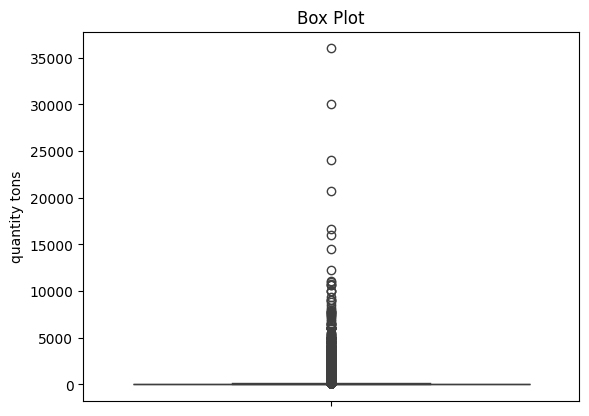

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
1,386.13,30153963,30,Won,WI,28,0.38,952.0,S0380700,628377,644.33,1.0,4.0,2021.0,1.0,1.0,2021.0
2,202.41,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,1.0,4.0,2021.0,1.0,1.0,2021.0
3,785.53,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,1.0,4.0,2021.0,1.0,3.0,2021.0
9,927.43,30152417,78,Won,S,28,1.04,912.0,1040912.O.TR.NPAC,628377,873.58,1.0,4.0,2021.0,1.0,4.0,2021.0
12,207.78,30152417,78,Won,S,28,1.04,1175.0,1041175.O.TR.NPAC,628377,866.58,1.0,4.0,2021.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67949,355.58,30148586,32,Won,W,41,0.62,1220.0,G9010/25/1220/0.63/CDC13080L,611993,809.00,2.0,7.0,2020.0,1.0,7.0,2020.0
67951,207.24,30148586,32,Won,W,41,0.62,1220.0,7016/25/1220/0.63,611993,806.00,2.0,7.0,2020.0,1.0,7.0,2020.0
67956,181.69,30148586,32,Won,W,41,0.74,1220.0,7016/25/1220/0.75,611993,786.00,2.0,7.0,2020.0,1.0,7.0,2020.0
68011,297.43,30201866,32,Won,W,41,0.75,1220.0,9010/15/1220/0.75/CDC13210 CKS,611993,724.00,2.0,7.0,2020.0,1.0,7.0,2020.0


In [36]:
detect_outliers(df['quantity tons'])

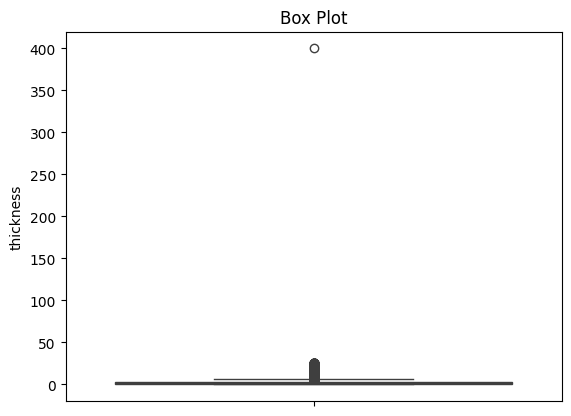

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
38,33.51,30394817,78,Won,S,10,13.00,1640.0,04010128466FI7KRA,640665,829.0,1.0,4.0,2021.0,1.0,6.0,2021.0
86,0.63,30214872,77,Won,W,15,15.00,1500.0,400 130025,640405,936.0,1.0,4.0,2021.0,1.0,5.0,2021.0
121,11.27,30218442,32,Won,W,66,7.00,1500.0,01B27T07-2,640405,1090.0,1.0,4.0,2021.0,1.0,7.0,2021.0
147,226.12,30165529,78,Lost,W,10,8.00,1560.0,S420MC-CAT_A,640665,982.0,1.0,4.0,2021.0,1.0,7.0,2021.0
294,214.21,30197989,27,Won,W,59,7.50,1111.0,HRCL_S-355-J2G4 7.5X1111,640665,924.0,31.0,3.0,2021.0,1.0,7.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67927,102.92,30164721,27,Won,S,66,7.85,1440.0,8655_AVI_38MNB5,640665,614.0,2.0,7.0,2020.0,1.0,9.0,2020.0
67929,100.61,30164721,27,Won,S,66,7.85,770.0,8655_AVI_38MNB5,640665,649.0,2.0,7.0,2020.0,1.0,9.0,2020.0
67930,52.11,30156308,28,Won,W,10,9.99,1500.0,NEQ1 S355J2+N,640665,447.0,2.0,7.0,2020.0,1.0,7.0,2020.0
67933,32.75,30201370,84,Won,S,15,8.00,1500.0,XR65008,640405,661.0,2.0,7.0,2020.0,1.0,9.0,2020.0


In [37]:
detect_outliers(df['thickness'])

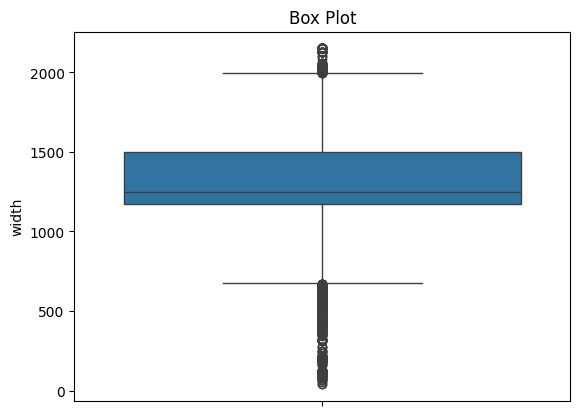

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
3,785.53,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,577.0,1.0,4.0,2021.0,1.0,3.0,2021.0
285,37.90,30406343,26,Lost,S,10,3.00,2000.0,DD11-CAT_A,1670798778,1037.0,31.0,3.0,2021.0,1.0,10.0,2021.0
289,31.48,30406343,26,Lost,S,10,3.00,2000.0,S235JR+AR-CL1,1670798778,1045.0,31.0,3.0,2021.0,1.0,10.0,2021.0
509,58.34,30406343,26,Won,S,10,2.50,2000.0,DC01 A,628377,1164.0,31.0,3.0,2021.0,1.0,10.0,2021.0
510,53.65,30406343,26,Won,S,10,2.99,2000.0,DC01 A,628377,1171.0,31.0,3.0,2021.0,1.0,10.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67667,33.55,30153509,27,Lost,S,41,8.00,2000.0,S275JR+AR-CL1,640665,518.0,3.0,7.0,2020.0,1.0,8.0,2020.0
67669,39.29,30153509,27,Lost,S,41,10.00,2000.0,S275JR+AR-CL1,640665,529.0,3.0,7.0,2020.0,1.0,8.0,2020.0
67729,341.88,30148743,78,Won,W,20,0.70,249.0,DC01EK 07X249 8071977,628112,653.0,2.0,7.0,2020.0,1.0,1.0,2020.0
67730,410.72,30148743,78,Won,W,20,0.60,600.0,DC01 06X600 8027276,628377,624.0,2.0,7.0,2020.0,1.0,1.0,2020.0


In [38]:
detect_outliers(df['width'])

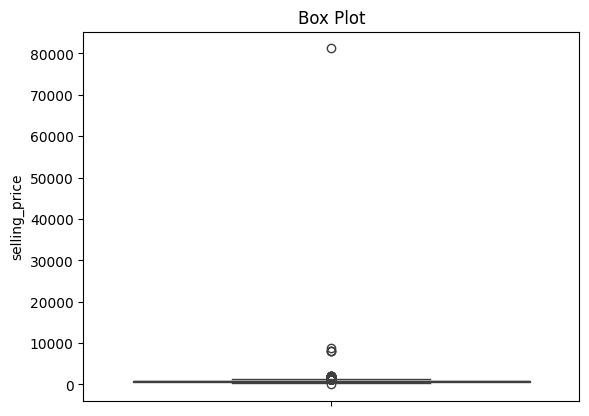

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
24,62.57,30268369,28,Won,W,38,0.55,1005.0,1PR1B1005055N2FBG1,611993,1375.00,1.0,4.0,2021.0,1.0,8.0,2021.0
88,68.81,30218009,32,Won,W,42,0.57,1370.0,62670991539US3CSA,611993,1363.00,1.0,4.0,2021.0,1.0,7.0,2021.0
89,69.20,30218009,32,Won,W,42,0.47,1304.0,62670991539US3CSA,611993,1396.00,1.0,4.0,2021.0,1.0,7.0,2021.0
90,63.52,30218009,32,Won,W,42,0.57,1142.0,62671963539US3ATL,611993,1358.00,1.0,4.0,2021.0,1.0,7.0,2021.0
91,66.17,30218009,32,Won,W,42,0.57,1230.0,62671963539US3ATL,611993,1365.00,1.0,4.0,2021.0,1.0,7.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57706,84.28,30157111,78,Won,W,41,0.50,1050.0,D8004,611993,8748.00,28.0,8.0,2020.0,1.0,7.0,2020.0
58716,28.50,30153956,30,Lost,W,41,0.50,1250.0,OPS1250/0.50JG,611993,1358.58,22.0,8.0,2020.0,1.0,10.0,2020.0
58787,124.80,30217988,25,Won,W,42,0.19,989.0,465606489V1F40ATL,611993,1502.00,20.0,8.0,2020.0,1.0,10.0,2020.0
60781,23.09,30271892,78,Lost,S,41,0.30,1050.0,80323111AEGF40CSA,611993,1471.00,3.0,8.0,2020.0,1.0,7.0,2020.0


In [39]:
detect_outliers(df['selling_price'])

In [40]:
len(df)

68026

### Removing Outliers

In [41]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    df = df.loc[~df.index.isin(df_outliers.index)]
    
    return df

In [42]:
for col in numerical_features:
    df = remove_outliers(df, col)

In [43]:
df.shape

(53677, 17)

<Axes: >

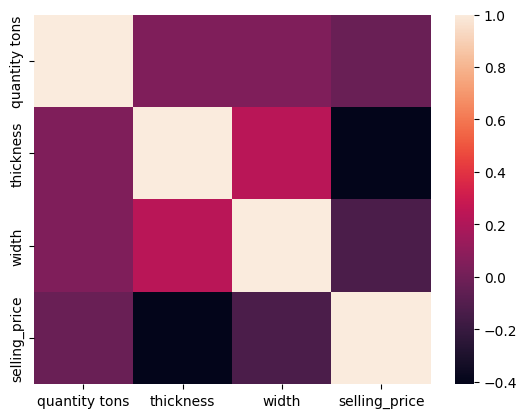

In [44]:
sns.heatmap(df[numerical_features].corr())

In [45]:
df[numerical_features].corr()['selling_price'].sort_values(ascending=False)[1:]

quantity tons   -0.026758
width           -0.128483
thickness       -0.409128
Name: selling_price, dtype: float64

### Transformation of Skewed data

Lambda value for quantity tons: 0.16


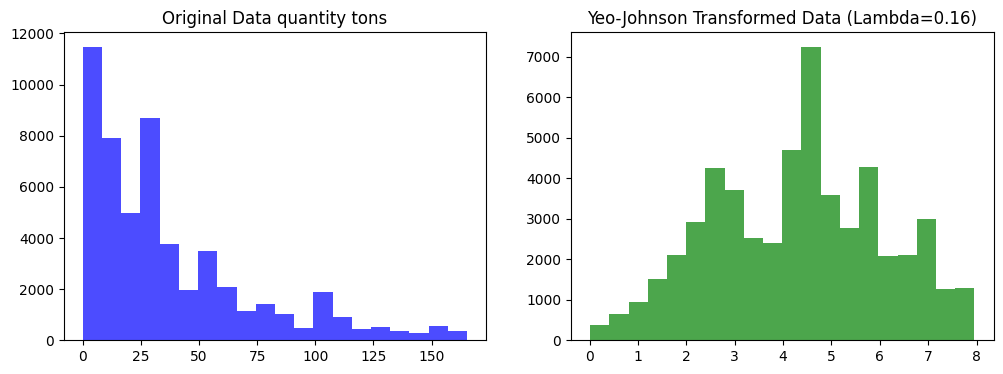

Lambda value for thickness: -0.93


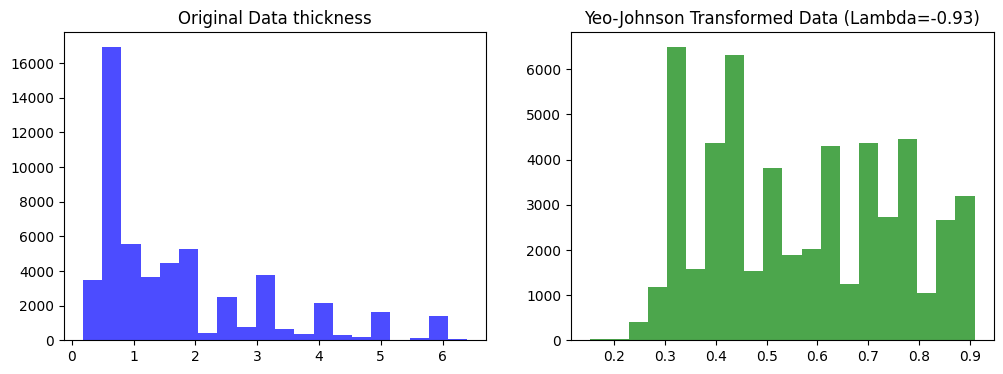

Lambda value for width: 0.93


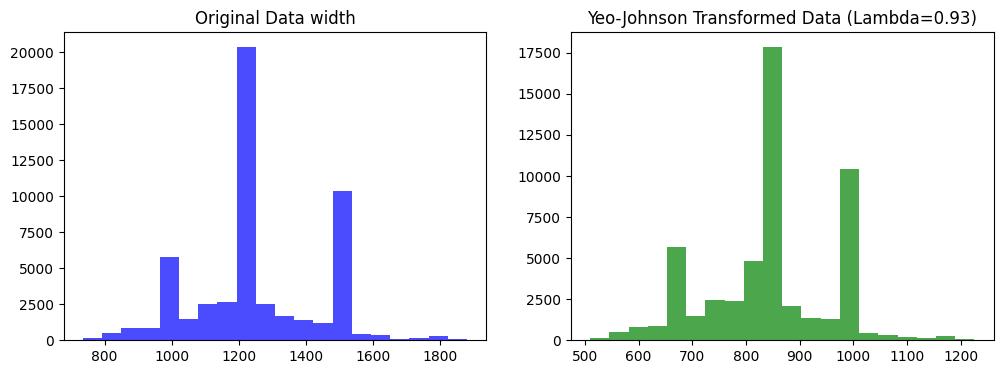

Lambda value for selling_price: 0.22


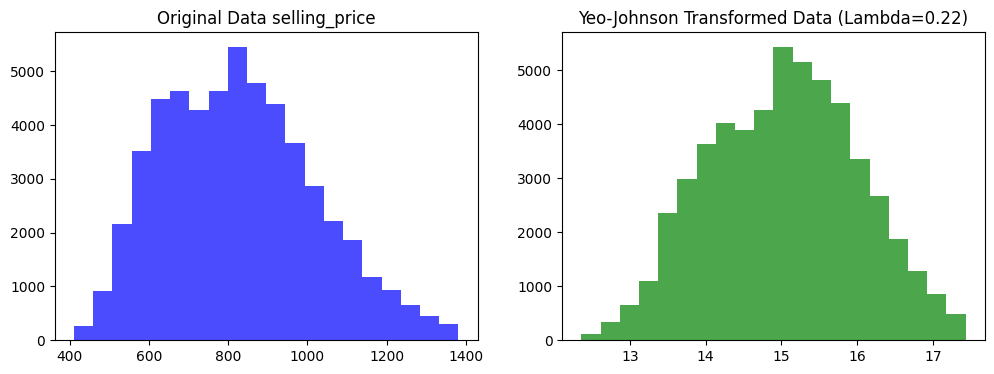

In [46]:
from scipy.stats import yeojohnson

for col in numerical_features:
    # Apply Yeo-Johnson transformation
    transformed_data, lambda_value = yeojohnson(df[col])

    # Print or log the lambda value
    print(f'Lambda value for {col}: {lambda_value:.2f}')

    # Plot the original and transformed data
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='blue', alpha=0.7)
    plt.title('Original Data ' + str(col))

    plt.subplot(1, 2, 2)
    plt.hist(transformed_data, bins=20, color='green', alpha=0.7)
    plt.title(f'Yeo-Johnson Transformed Data (Lambda={lambda_value:.2f})')

    plt.show()
    df[col] = transformed_data


In [47]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
0,5.643713,30156308,28,Won,W,10,0.688458,992.597234,DEQ1 S460MC,1670798778,15.260287,1.0,4.0,2021.0,1.0,7.0,2021.0
4,4.713869,30202362,27,Won,S,10,0.380817,685.816879,DC04EK,628377,15.827758,1.0,4.0,2021.0,1.0,7.0,2021.0
5,6.276452,30153510,30,Won,W,41,0.378792,846.452669,PEA1265X595SP,611993,16.625609,1.0,4.0,2021.0,1.0,4.0,2021.0
6,3.995971,30211222,30,Won,W,10,0.314209,615.730789,684Z WHITE ETEX B7032,611993,17.201602,1.0,4.0,2021.0,1.0,7.0,2021.0
7,6.175066,30153510,30,Won,W,41,0.378792,846.452669,GRE1265X595SP,611993,16.623438,1.0,4.0,2021.0,1.0,4.0,2021.0


In [48]:
for col in numerical_features:
    df[col] = np.round(df[col],2)

In [49]:
df.dtypes

quantity tons      float64
customer             int32
country              int32
status              object
item type           object
application          int32
thickness          float64
width              float64
material_ref        object
product_ref         object
selling_price      float64
purchased_day      float64
purchased_month    float64
purchased_year     float64
delivered_day      float64
delivered_month    float64
delivered_year     float64
dtype: object

In [50]:
df['item type'].unique()

array(['W', 'S', 'Others', 'PL', 'IPL', 'WI'], dtype=object)

### Encoding

In [51]:
df['status'] = df['status'].map({'Won' : 1, 'Lost' : 0})

In [52]:
df = pd.get_dummies(df, columns = ['item type'], prefix = ['item_type'])

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['material_ref'] = le.fit_transform(df['material_ref'])
df['product_ref'] = le.fit_transform(df['product_ref'])

In [54]:
df.corr()['selling_price'].sort_values(ascending=False)[1:]

purchased_year      0.558453
delivered_year      0.496022
application         0.173454
item_type_W         0.123264
customer            0.073285
product_ref         0.050667
country             0.032846
purchased_day       0.027828
item_type_IPL       0.001668
status             -0.004018
item_type_Others   -0.007218
quantity tons      -0.020649
item_type_WI       -0.033263
material_ref       -0.037832
item_type_S        -0.081389
item_type_PL       -0.104706
width              -0.127354
delivered_month    -0.241078
purchased_month    -0.426687
thickness          -0.493937
delivered_day            NaN
Name: selling_price, dtype: float64

In [55]:
df.corr()['status'].sort_values(ascending=False)[1:]

item_type_W         0.165772
country             0.099874
application         0.097471
item_type_PL        0.069628
purchased_year      0.030274
item_type_Others    0.021937
item_type_WI        0.011820
product_ref         0.007722
item_type_IPL       0.006228
delivered_month     0.003847
selling_price      -0.004018
purchased_month    -0.005366
purchased_day      -0.018495
delivered_year     -0.026922
material_ref       -0.028119
width              -0.032556
thickness          -0.033827
customer           -0.042197
quantity tons      -0.138405
item_type_S        -0.205751
delivered_day            NaN
Name: status, dtype: float64

In [57]:
df.drop(['delivered_day','item_type_IPL'],axis = 1, inplace = True)

<Axes: >

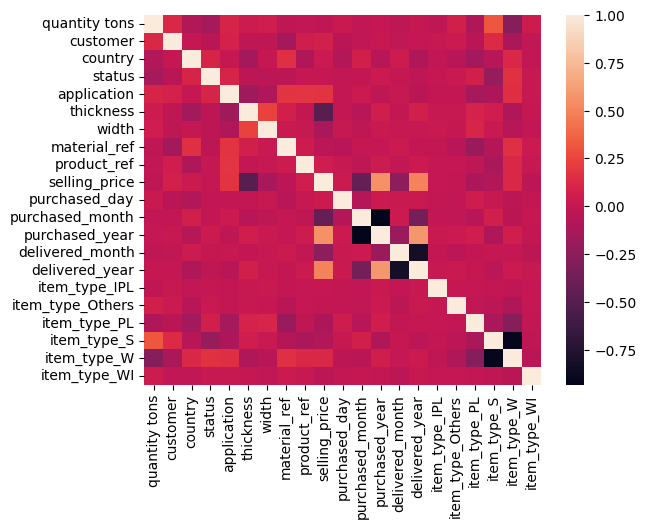

In [58]:
sns.heatmap(df.corr())

In [61]:
df = df.reset_index(drop = True)

In [62]:
df.to_csv('Copper_Cleaned.csv', index = False)